## Large Scale Final Project
Do Amazon voting behaviors reveal social conformity?
Chun Hu

### Category 3: Electronics

In [0]:
data = spark.read.parquet('s3://amazon-reviews-pds/parquet/product_category=Electronics/*.parquet')

VBox()

Starting Spark application


ID,YARN Application ID,Kind,State,Spark UI,Driver log,Current session?
3,application_1591214933999_0004,pyspark,idle,,,✔


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

SparkSession available as 'spark'.


FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
print('Total Columns: %d' % len(data.dtypes))
print('Total Rows: %d' % data.count())
data.printSchema()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Total Columns: 15
Total Rows: 3120938
root
 |-- marketplace: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- review_id: string (nullable = true)
 |-- product_id: string (nullable = true)
 |-- product_parent: string (nullable = true)
 |-- product_title: string (nullable = true)
 |-- star_rating: integer (nullable = true)
 |-- helpful_votes: integer (nullable = true)
 |-- total_votes: integer (nullable = true)
 |-- vine: string (nullable = true)
 |-- verified_purchase: string (nullable = true)
 |-- review_headline: string (nullable = true)
 |-- review_body: string (nullable = true)
 |-- review_date: date (nullable = true)
 |-- year: integer (nullable = true)

In [0]:
data.groupby('marketplace').count().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------+-------+
|marketplace|  count|
+-----------+-------+
|         DE|   4035|
|         US|3105328|
|         UK|   5851|
|         FR|   2363|
|         JP|   3361|
+-----------+-------+

In [0]:
data = data.withColumn('helpful_ratio', (data.helpful_votes / data.total_votes).cast("float"))
data = data.filter('helpful_ratio IS NOT NULL')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_rating = data.groupBy('product_id').avg('star_rating')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
data_elec = data.join(avg_rating, on=['product_id'], how='left_outer')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
data_elec[['product_id', 'star_rating', 'helpful_ratio', 'avg(star_rating)']].show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-----------+-------------+-----------------+
|product_id|star_rating|helpful_ratio| avg(star_rating)|
+----------+-----------+-------------+-----------------+
|0764801201|          5|       0.1875|              5.0|
|193493139X|          2|          0.5|4.111111111111111|
|193493139X|          4|          1.0|4.111111111111111|
|193493139X|          3|   0.33333334|4.111111111111111|
|193493139X|          5|          1.0|4.111111111111111|
|193493139X|          5|          1.0|4.111111111111111|
|193493139X|          3|          0.5|4.111111111111111|
|193493139X|          5|          1.0|4.111111111111111|
|193493139X|          5|          1.0|4.111111111111111|
|193493139X|          5|          1.0|4.111111111111111|
|9641766775|          5|          1.0|              5.0|
|9970119826|          4|          1.0|              4.0|
|9981724742|          5|          0.5|              5.0|
|B000000O2F|          5|          1.0|              5.0|
|B000000O2W|          4|       

In [0]:
data_elec = data_elec.withColumn('avg_rating', data_elec["avg(star_rating)"])

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

Descriptive Statsitics of products in ELECTRONICS category:

In [0]:
data_elec[['avg_rating']].summary().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+------------------+
|summary|        avg_rating|
+-------+------------------+
|  count|           1227998|
|   mean|3.7017601005865135|
| stddev|0.7180714873723527|
|    min|               1.0|
|    25%| 3.292307692307692|
|    50%|3.7868852459016393|
|    75%| 4.176470588235294|
|    max|               5.0|
+-------+------------------+

In [0]:
data_elec[['helpful_votes']].summary().show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-------+-----------------+
|summary|    helpful_votes|
+-------+-----------------+
|  count|          1227998|
|   mean|4.740361954986898|
| stddev|33.74947861083376|
|    min|                0|
|    25%|                1|
|    50%|                1|
|    75%|                3|
|    max|            12786|
+-------+-----------------+

In [0]:
from  pyspark.sql.functions import abs

data_elec = data_elec.withColumn('rating_diff', abs(data_elec.avg_rating - data_elec.star_rating).cast("float"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
data_elec[['product_id', 'helpful_ratio', 'rating_diff']].show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+----------+-------------+-----------+
|product_id|helpful_ratio|rating_diff|
+----------+-------------+-----------+
|0764801201|       0.1875|        0.0|
|193493139X|          0.5|  2.1111112|
|193493139X|          1.0| 0.11111111|
|193493139X|          1.0|  0.8888889|
|193493139X|          1.0|  0.8888889|
|193493139X|          0.5|  1.1111112|
|193493139X|          1.0|  0.8888889|
|193493139X|          1.0|  0.8888889|
|193493139X|   0.33333334|  1.1111112|
|193493139X|          1.0|  0.8888889|
|9641766775|          1.0|        0.0|
|9970119826|          1.0|        0.0|
|9981724742|          0.5|        0.0|
|B000000O2F|          1.0|        0.0|
|B000000O2W|          1.0|        1.0|
|B000000O2W|          1.0|        0.0|
|B000000O2W|          1.0|        1.0|
|B000001OL2|          1.0|        1.5|
|B000001OL2|          0.0|        1.5|
|B000001OL2|          1.0|        1.5|
+----------+-------------+-----------+
only showing top 20 rows

In [0]:
sc.install_pypi_package("seaborn")
sc.install_pypi_package("pandas")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

  Using cached https://files.pythonhosted.org/packages/c7/e6/54aaaafd0b87f51dfba92ba73da94151aa3bc179e5fe88fc5dfb3038e860/seaborn-0.10.1-py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/a4/5f/1b6e0efab4bfb738478919d40b0e3e1a06e3d9996da45eb62a77e9a090d9/pandas-1.0.4-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/dd/82/c1fe128f3526b128cfd185580ba40d01371c5d299fcf7f77968e22dfcc2e/scipy-1.4.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/b2/c2/71fcf957710f3ba1f09088b35776a799ba7dd95f7c2b195ec800933b276b/matplotlib-3.2.1-cp37-cp37m-manylinux1_x86_64.whl
  Using cached https://files.pythonhosted.org/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl
  Using cached https://files.pythonhosted.org/packages/8a/bb/488841f56197b13700afd5658fc279a2025a39e22449b7cf29864669b15d/pyparsing-2.4.7-py2.py3-none-any.whl
  Using cached 

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

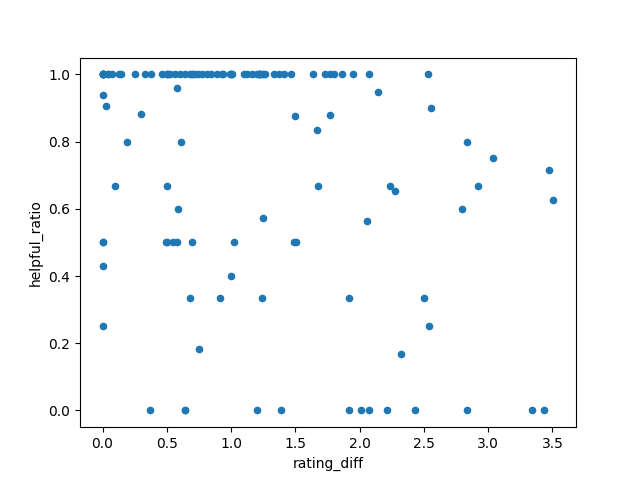

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt

sampled_df = data_elec.sample(fraction=0.0001).toPandas()
sampled_df.plot.scatter('rating_diff', 'helpful_ratio')
%matplot plt

While the fraction of data looks sparse on the plot, we can still see that the majority of reviews have high helpfulness ratio.

In [0]:
from pyspark.ml.feature import Bucketizer

bucketizer = Bucketizer(splits=[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
                        inputCol="helpful_ratio", outputCol="ratio_buckets")
elec_buck = bucketizer.setHandleInvalid("keep").transform(data_elec)

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
from pyspark.sql.functions import udf
from pyspark.sql.types import *

t = {0.0:"0.1", 1.0:"0.2", 2.0:"0.3", 3.0:"0.4", 4.0:"0.5", 5.0:"0.6", 6.0:"0.7", 7.0:"0.8", 8.0:"0.9", 9.0:"1.0"}
udf_foo = udf(lambda x: t[x], StringType())
elec_buck = elec_buck.withColumn("helpfulness_ratio", udf_foo("ratio_buckets"))

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_df = (elec_buck.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_df = avg_df.filter(avg_df.helpfulness_ratio != '0.1')
avg_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+------------------+
|helpfulness_ratio|  avg(rating_diff)|
+-----------------+------------------+
|              1.0|0.9623035707755714|
|              0.9|1.1493560212149398|
|              0.8| 1.245390990597436|
|              0.7|1.2674880935287434|
|              0.6|1.2488782726200756|
|              0.5|1.7104242374605299|
|              0.4|1.5189230273368826|
|              0.3|1.7199843217527189|
|              0.2| 1.893569632518367|
+-----------------+------------------+

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

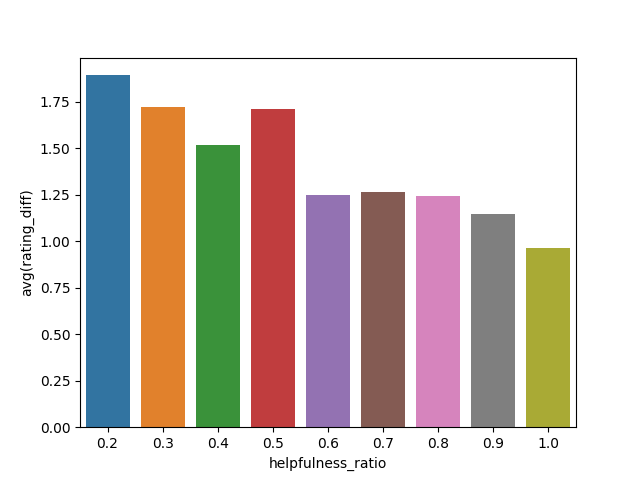

In [0]:
plt.close()

sns.barplot(x='helpfulness_ratio', y='avg(rating_diff)', data=avg_df.toPandas())
%matplot plt

The barplot shows that as helpfulness ratio increases, the difference between review rating and average product rating decreases. This confirms our hypothesis that there is social conformity in voting behaviors.

### By Marketplace
Do different marketplaces (or countries) have different trends?

In [0]:
us_elec = elec_buck.filter(elec_buck.marketplace == 'US')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_us = (us_elec.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_df = avg_us.filter(avg_us.helpfulness_ratio != '0.1')
avg_df = avg_df.withColumn('diff', avg_df["avg(rating_diff)"])
avg_df = avg_df.selectExpr("helpfulness_ratio as helpfulness_ratio", "diff as US")
avg_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+------------------+
|helpfulness_ratio|                US|
+-----------------+------------------+
|              1.0|0.9624300793588386|
|              0.9|1.1507502238393694|
|              0.8|1.2480899677806245|
|              0.7|1.2697243881521076|
|              0.6|1.2502017389688846|
|              0.5|1.7128400368561592|
|              0.4|1.5220623409422789|
|              0.3|1.7214940221667083|
|              0.2|1.8951900952023906|
+-----------------+------------------+

In [0]:
uk_elec = elec_buck.filter(elec_buck.marketplace == 'UK')

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
avg_uk = (uk_elec.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_uk = avg_uk.filter(avg_uk.helpfulness_ratio != '0.1')
avg_uk = avg_uk.withColumn('diff', avg_uk["avg(rating_diff)"])
avg_df = avg_df.join(avg_uk, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "diff as UK")
avg_df.show()

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

+-----------------+------------------+------------------+
|helpfulness_ratio|                US|                UK|
+-----------------+------------------+------------------+
|              1.0|0.9624300793588386|0.9494127469796351|
|              0.9|1.1507502238393694|1.0573600803925232|
|              0.8|1.2480899677806245|0.9935441494433799|
|              0.7|1.2697243881521076|1.2026874081828656|
|              0.6|1.2502017389688846|1.2578439617670383|
|              0.5|1.7128400368561592|1.9352700942092471|
|              0.4|1.5220623409422789|1.7008967198431493|
|              0.3|1.7214940221667083|1.8980954951933913|
|              0.2|1.8951900952023906| 2.037299324686711|
+-----------------+------------------+------------------+

In [0]:
de_elec = elec_buck.filter(elec_buck.marketplace == 'DE')

avg_de = (de_elec.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_de = avg_de.filter(avg_de.helpfulness_ratio != '0.1')
avg_de = avg_de.withColumn('diff', avg_de["avg(rating_diff)"])
avg_df = avg_df.join(avg_de, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "UK", "diff as DE")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
fr_elec = elec_buck.filter(elec_buck.marketplace == 'FR')

avg_fr = (fr_elec.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_fr = avg_fr.filter(avg_fr.helpfulness_ratio != '0.1')
avg_fr = avg_fr.withColumn('diff', avg_fr["avg(rating_diff)"])
avg_df = avg_df.join(avg_fr, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "UK", "DE", "diff as FR")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

In [0]:
jp_elec = elec_buck.filter(elec_buck.marketplace == 'JP')

avg_jp = (jp_elec.groupBy('helpfulness_ratio')
                    .avg('rating_diff')
                    .sort('helpfulness_ratio', ascending=False)
         )
avg_jp = avg_jp.filter(avg_jp.helpfulness_ratio != '0.1')
avg_jp = avg_jp.withColumn('diff', avg_jp["avg(rating_diff)"])
avg_df = avg_df.join(avg_jp, on=['helpfulness_ratio'], how='left_outer')
avg_df = avg_df.selectExpr("helpfulness_ratio", "US", "UK", "DE", "FR", "diff as JP")

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

VBox()

FloatProgress(value=0.0, bar_style='info', description='Progress:', layout=Layout(height='25px', width='50%'),…

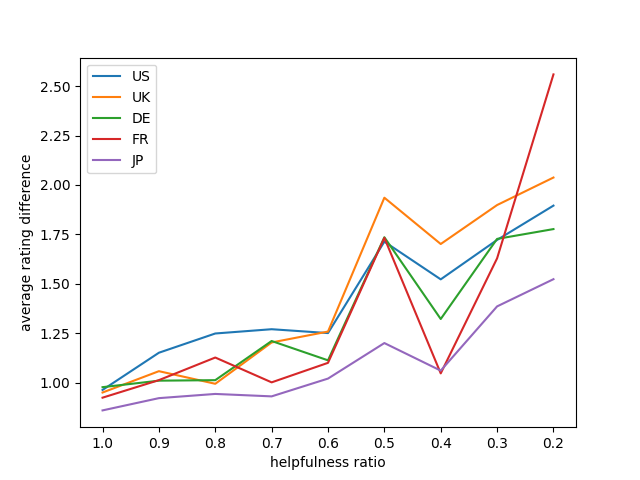

In [0]:
# plot for all countries
plt.close()

US, = plt.plot('helpfulness_ratio', 'US', data=avg_df.toPandas(), label="US")
UK, = plt.plot('helpfulness_ratio', 'UK', data=avg_df.toPandas(), label="UK")
DE, = plt.plot('helpfulness_ratio', 'DE', data=avg_df.toPandas(), label="DE")
FR, = plt.plot('helpfulness_ratio', 'FR', data=avg_df.toPandas(), label="FR")
JP, = plt.plot('helpfulness_ratio', 'JP', data=avg_df.toPandas(), label="JP")
plt.legend(handles=[US, UK, DE, FR, JP])
plt.xlabel('helpfulness ratio')
plt.ylabel('average rating difference')
%matplot plt

In general, voting behaviors reveal the trends for social conformity. However, there are huge fluctuations at helpfulness ratios equal 0.5 and 0.4, especially for France. One reason could be that there are few data in the France marketplace and so the variance is bigger than usual. Another reason could be that people have diverse opinions about electronics products and opinions vary when it comes to the helpfulness of reviews.

### Sentiment Analysis
What are some characteristics of reviews that have high or low helpfulness ratio?

In [1]:
import os

# Install java
! apt-get install -y openjdk-8-jdk-headless -qq > /dev/null
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["PATH"] = os.environ["JAVA_HOME"] + "/bin:" + os.environ["PATH"]
! java -version

# Install pyspark
! pip install --ignore-installed pyspark==2.4.4

# Install Spark NLP
! pip install --ignore-installed spark-nlp==2.5.1

# Quick SparkSession start
import sparknlp
spark = sparknlp.start()

print("Spark NLP version")
sparknlp.version()
print("Apache Spark version")
spark.version

openjdk version "1.8.0_252"
OpenJDK Runtime Environment (build 1.8.0_252-8u252-b09-1~18.04-b09)
OpenJDK 64-Bit Server VM (build 25.252-b09, mixed mode)
     |████████████████████████████████| 215.7MB 60kB/s 
     |████████████████████████████████| 204kB 48.0MB/s 
  Created wheel for pyspark: filename=pyspark-2.4.4-py2.py3-none-any.whl size=216130388 sha256=4c6ca6b69185f44c3f46d7bdca10608fd84b372cf2fd974d33733bc911e1d8bb
  Stored in directory: /root/.cache/pip/wheels/ab/09/4d/0d184230058e654eb1b04467dbc1292f00eaa186544604b471
Successfully built pyspark
     |████████████████████████████████| 122kB 9.9MB/s 
Spark NLP version
Apache Spark version


'2.4.4'

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import glob
import pandas as pd

file_path = glob.glob("/content/drive/My Drive/amazon-reviews-dataset/*")
file = file_path[0]

with open(file) as tsvfile:
    col_names = ["marketplace", "customer_id", "review_id", "product_id", "product_parent", "product_title",
               "category", "star_rating", "helpful_votes", "total_votes", "vine", "verified_purchase", 
               "review_headline", "review_body", "review_date"]
    data = pd.read_csv(file, sep='\t', names=col_names, skiprows=2000000, low_memory=False)

In [7]:
data['helpful_ratio'] = data['helpful_votes'] / data['total_votes']
data = data[data['helpful_ratio'].notnull()]
data.head()

,marketplace,customer_id,review_id,product_id,product_parent,product_title,category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,helpful_ratio
0,US,15052986,R3P9LHY1SE5NVY,B0012YFY54,906275872,Sangean Digital Rechargeable Portable Radio,Electronics,5,2,2,N,Y,Fabulous reception,"Love this radio so much, I bought two!! I lov...",2013-04-30,1.0
2,US,21860303,R1ERZIZ12HYJ2X,B001DFS4BI,393275326,Winegard HDTV Antenna,Electronics,3,1,1,N,Y,Good quality,"Antenna was good quality, a little daunting to...",2013-04-30,1.0
3,US,43863107,R3QSZBJB8R8D6F,B002MAPT7U,808084969,Clip Plus 4 GB MP3 Player (Black),Electronics,5,1,1,N,Y,Buy it!,Very upgradeable and easy to function. Why pay...,2013-04-30,1.0
4,US,42852005,R2J88M2MDLUZII,B005JK61MW,468304863,Grounded Travel Plug Adapter,Electronics,5,4,4,N,Y,OREI Universal 2 in 1 Travel Adapter for South...,"I purchased this for my mom, who went on a tri...",2013-04-30,1.0
6,US,26742748,R1UMGOR1PR157G,B005PQRLYC,420336991,"Waxed Lacing Tape, 500 Yard Spool, Black",Electronics,5,1,2,N,Y,Flat waxed nylon lace.,Not as strong as I figured but it seems to do ...,2013-04-30,0.5


In [8]:
most_helpful = data[data['helpful_ratio'] == 1.0]
most_helpful.shape

(296230, 16)

In [9]:
least_helpful = data[data['helpful_ratio'] <= 0.2]
least_helpful.shape

(82780, 16)

In [0]:
from sklearn.utils import shuffle
most_helpful = shuffle(most_helpful)[:10000]
least_helpful = shuffle(least_helpful)[:10000]

In [11]:
from sparknlp.pretrained import PretrainedPipeline

pipeline = PretrainedPipeline('analyze_sentiment', lang='en')
most_helpful['sentiment'] = most_helpful['review_body'].apply(pipeline.annotate)

analyze_sentiment download started this may take some time.
Approx size to download 4.9 MB
[OK!]


In [0]:
most_helpful['bin'] = most_helpful.sentiment.apply(lambda x: x['sentiment'][0])
most_helpful['sentiment_value'] = most_helpful.bin.astype("category").cat.codes - 1

In [13]:
most_helpful['sentiment_value'].mean()

0.4804

In [0]:
least_helpful['sentiment'] = least_helpful['review_body'].apply(pipeline.annotate)

In [0]:
least_helpful['bin'] = least_helpful.sentiment.apply(lambda x: x['sentiment'][0])
least_helpful['sentiment_value'] = least_helpful.bin.astype("category").cat.codes - 1

In [16]:
least_helpful['sentiment_value'].mean()

0.462

Helpful reviews and unhelpful reviews have similar sentiment values.

### TF-IDF
What are the top terms in helpful and unhelpful reviews?

In [0]:
most_helpful = data[data['helpful_ratio'] == 1.0]
least_helpful = data[data['helpful_ratio'] < 0.2]
most_helpful = shuffle(most_helpful)[:10000][['review_body']]
least_helpful = shuffle(least_helpful)[:10000][['review_body']]

In [0]:
from pyspark.sql import SparkSession
# start spark session
spark = SparkSession.builder.master('local[*]').getOrCreate()

spark_helpful = spark.createDataFrame(most_helpful)
spark_unhelpful = spark.createDataFrame(least_helpful)

In [0]:
from pyspark.ml.feature import *
from pyspark.ml import Pipeline

tokenizer = Tokenizer(inputCol="review_body", outputCol="words")
remover = StopWordsRemover(inputCol="words", outputCol="filtered")
countVect = CountVectorizer(inputCol="filtered", outputCol="cv",  minDF=5.0)
idf = IDF(inputCol="cv", outputCol="idf")
pipeline = Pipeline(stages=[tokenizer, remover, countVect, idf])

Helpful Reviews

In [0]:
helpful = pipeline.fit(spark_helpful).transform(spark_helpful)

In [0]:
helpful_df = helpful.select("filtered", "idf").toPandas()

In [0]:
words = []
for index, value in helpful_df['filtered'].iteritems():
    words += value

features = []
for index, value in helpful_df["idf"].iteritems():
    dict_val = value.values.tolist()
    features += dict_val

In [0]:
from operator import itemgetter
indices, list_sorted = zip(*sorted(enumerate(features), key=itemgetter(1)))

In [25]:
for i in indices[:15]:
    print(words[i])

display
place
line-of-sight
expected
based
airport
require

bass
purchased
falls
running
chapter
use
earbuds


Unhelpful Reviews

In [0]:
unhelpful = pipeline.fit(spark_unhelpful).transform(spark_unhelpful)

In [0]:
unhelpful_df = unhelpful.select("filtered", "idf").toPandas()

In [0]:
words = []
for index, value in unhelpful_df['filtered'].iteritems():
    words += value

features = []
for index, value in unhelpful_df["idf"].iteritems():
    dict_val = value.values.tolist()
    features += dict_val

In [0]:
from operator import itemgetter
indices, list_sorted = zip(*sorted(enumerate(features), key=itemgetter(1)))

In [30]:
for i in indices[:15]:
    print(words[i])

price
sent
durable
current
case
many
microsoft.-
getting
esta
ao
sides
absolutely
control
tuner
first
